# Model creation and accuracy caheck for the Design-4 data
 


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd . read_csv(("D:\BreakPads_ML\Raw_Input_Data\Design4.csv"))
df = df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"])
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
df.head() 

,1,2,3,4,5,6,7,8,9,10,...,881,882,883,Design,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,2.57632,2.30168,2.46116,2.65376,2.81294,2.75934,2.66311,2.46884,2.30181,2.56664,...,1.72780,1.72474,1.81153,Design_4,7.5,29.3,86.8,15,100,50.0
1,3.16887,2.76706,2.94101,3.17117,3.36446,3.29921,3.18249,2.94991,2.76609,3.15568,...,2.06954,2.06586,2.16952,Design_4,7.5,29.3,86.8,15,100,60.0
2,3.77232,3.23205,3.41837,3.68620,3.91406,3.83699,3.69953,3.42848,3.22984,3.75539,...,2.41059,2.40634,2.52677,Design_4,7.5,29.3,86.8,15,100,70.0
3,4.38431,3.69657,3.89371,4.19934,4.46210,4.37309,4.21472,3.90503,3.69302,4.36345,...,2.75113,2.74633,2.88347,Design_4,7.5,29.3,86.8,15,100,80.0
4,5.00352,4.16092,4.36773,4.71131,5.00924,4.90822,4.72877,4.38025,4.15598,4.97861,...,3.09127,3.08595,3.23978,Design_4,7.5,29.3,86.8,15,100,90.0


## EDA

In [3]:
df.shape

(150, 724)

In [4]:
#check for duplicates
df.duplicated().value_counts()

False    150
dtype: int64

In [5]:
#check for any missing values
for all in df:
    x=all
    if(pd.isnull(df[x]).any()==False):
        continue
    else:
        print(x+' has null')

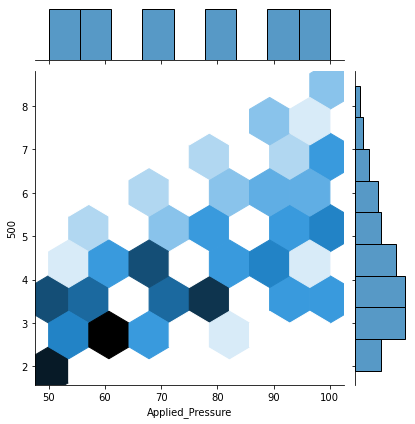

In [7]:
### Bivariant analysis
sns.jointplot(x='Applied_Pressure', y='500', data=df, kind='hex')

<AxesSubplot:xlabel='Applied_Pressure', ylabel='800'>

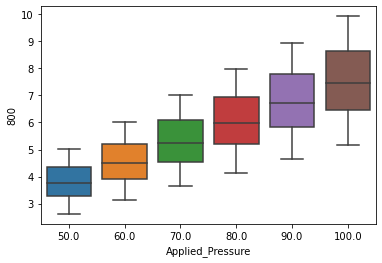

In [8]:
sns.boxplot(x= 'Applied_Pressure',y='800',data=df)

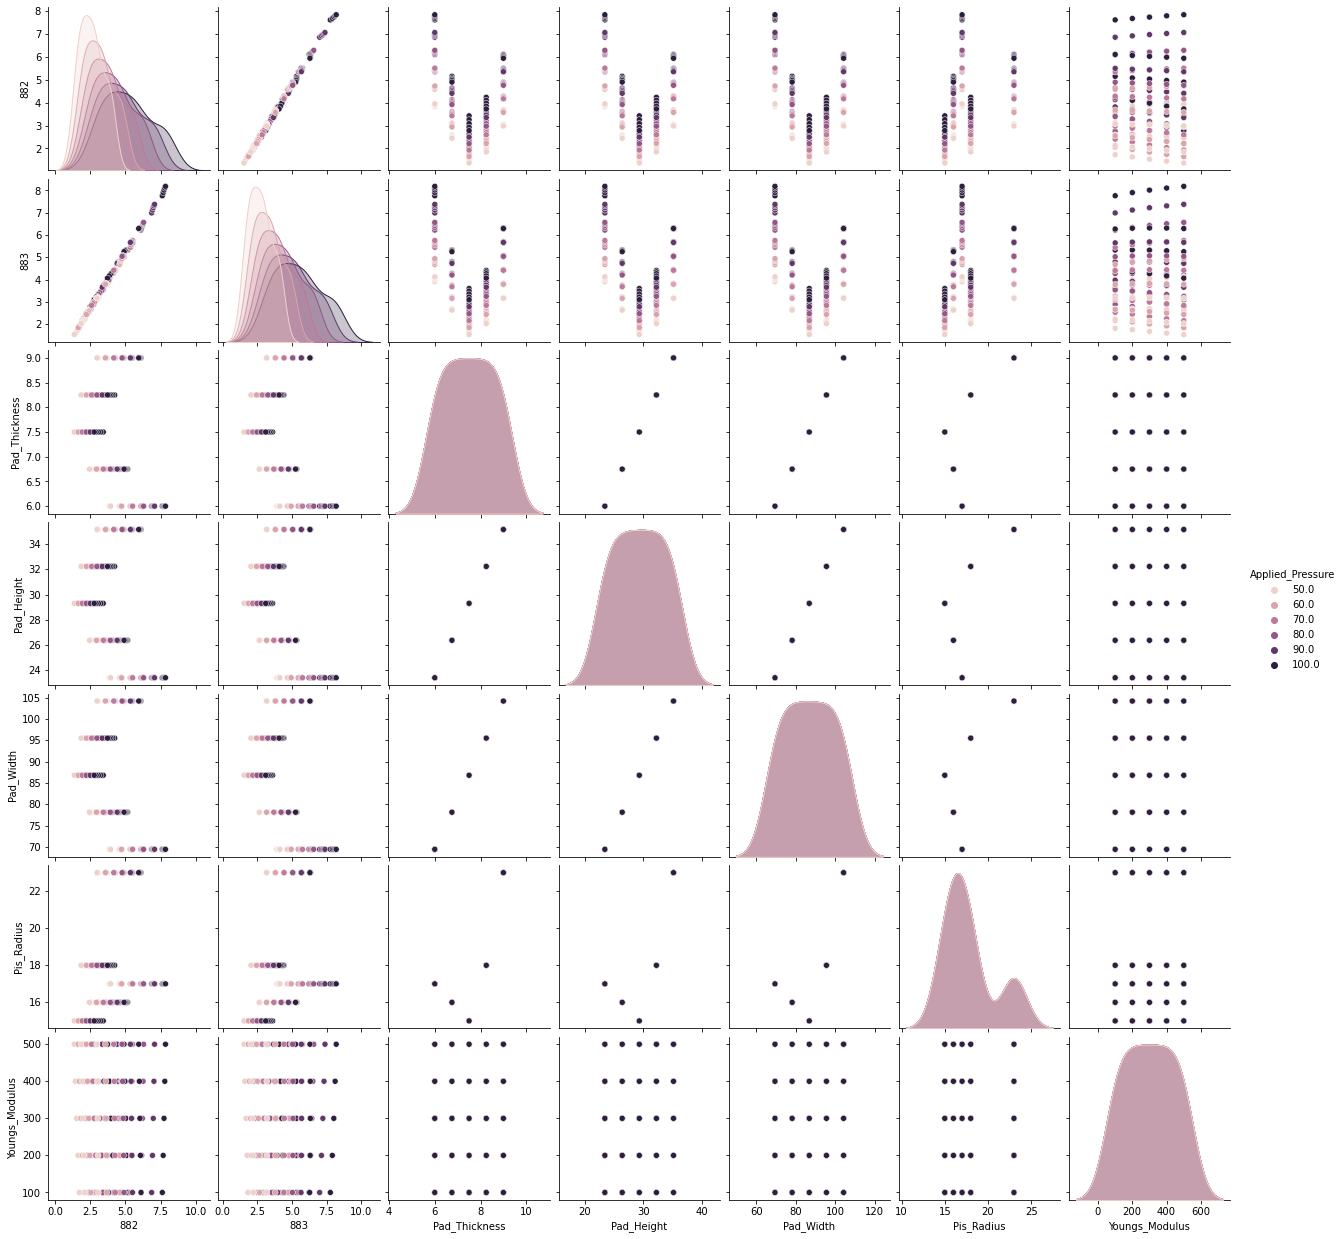

In [28]:
df_2=df
df_2 = df_2.iloc[:,715:]
df_2 = df_2.drop(columns='Design')
sns.pairplot(df_2,hue='Applied_Pressure')

## Feature transposelection

In [31]:
x_features = df.iloc[:,718:]
print(x_features.dtypes)
x_features.head(12)

Pad_Thickness       float64
Pad_Height          float64
Pad_Width           float64
Pis_Radius            int64
Youngs_Modulus        int64
Applied_Pressure    float64
dtype: object


,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,7.5,29.3,86.8,15,100,50.0
1,7.5,29.3,86.8,15,100,60.0
2,7.5,29.3,86.8,15,100,70.0
3,7.5,29.3,86.8,15,100,80.0
4,7.5,29.3,86.8,15,100,90.0
5,7.5,29.3,86.8,15,100,100.0
6,7.5,29.3,86.8,15,200,50.0
7,7.5,29.3,86.8,15,200,60.0
8,7.5,29.3,86.8,15,200,70.0
9,7.5,29.3,86.8,15,200,80.0


In [32]:
y_targets = df.iloc[:,:717]
print(y_targets.dtypes.value_counts())
y_targets.head(12)

float64    717
dtype: int64


,1,2,3,4,5,6,7,8,9,10,...,874,875,876,877,878,879,880,881,882,883
0,2.57632,2.30168,2.46116,2.65376,2.81294,2.75934,2.66311,2.46884,2.30181,2.56664,...,1.50609,2.73369,2.79288,2.82089,2.84844,1.69044,1.72010,1.72780,1.72474,1.81153
1,3.16887,2.76706,2.94101,3.17117,3.36446,3.29921,3.18249,2.94991,2.76609,3.15568,...,1.80310,3.26793,3.34001,3.37434,3.40732,2.02407,2.06017,2.06954,2.06586,2.16952
2,3.77232,3.23205,3.41837,3.68620,3.91406,3.83699,3.69953,3.42848,3.22984,3.75539,...,2.09960,3.79998,3.88516,3.92593,3.96434,2.35677,2.39948,2.41059,2.40634,2.52677
3,4.38431,3.69657,3.89371,4.19934,4.46210,4.37309,4.21472,3.90503,3.69302,4.36345,...,2.39569,4.33030,4.42872,4.47602,4.51985,2.68876,2.73821,2.75113,2.74633,2.88347
4,5.00352,4.16092,4.36773,4.71131,5.00924,4.90822,4.72877,4.38025,4.15598,4.97861,...,2.69136,4.85957,4.97136,5.02525,5.07449,3.02023,3.07651,3.09127,3.08595,3.23978
5,5.62898,4.62530,4.84088,5.22257,5.55591,5.44279,5.24214,4.85461,4.61890,5.59988,...,2.98666,5.38823,5.51349,5.57404,5.62866,3.35119,3.41435,3.43096,3.42517,3.59568
6,2.65552,2.54785,2.76802,2.97823,3.13497,3.08431,2.98813,2.77760,2.55151,2.64960,...,1.35185,3.05960,3.11671,3.14144,3.16762,1.58822,1.62240,1.63218,1.62952,1.74683
7,3.26420,3.06473,3.30990,3.56017,3.74952,3.68811,3.57201,3.32093,3.06782,3.25549,...,1.62230,3.65819,3.72737,3.75749,3.78863,1.90609,1.94711,1.95873,1.95535,2.09512
8,3.88719,3.58165,3.84856,4.13878,4.36126,4.28890,4.15260,3.86101,3.58398,3.87538,...,1.89307,4.25364,4.33514,4.37081,4.40692,2.22337,2.27138,2.28489,2.28085,2.44284
9,4.52205,4.09845,4.38447,4.71460,4.97064,4.88716,4.73042,4.39829,4.09984,4.50689,...,2.16397,4.84647,4.94047,4.98184,5.02292,2.54007,2.59518,2.61065,2.60600,2.79001


In [33]:
print(x_features.shape,y_targets.shape)

(150, 6) (150, 717)


## Model Building with mutiple target

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

In [35]:
x_test, x_train, y_test, y_train = train_test_split(x_features, y_targets, test_size = 0.3, random_state = 100)

### 1. MultiOutPut Regressor with Ridge estimator

In [36]:
MOR_Rd_1 = MultiOutputRegressor(Ridge(random_state=123))
MOR_Rd_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=Ridge(random_state=123))

In [37]:
print('Model_1 train score = ', MOR_Rd_1.score(x_train, y_train))
print('Model_1 test score = ', MOR_Rd_1.score(x_test, y_test))

Model_1 train score =  0.930494127941583
Model_1 test score =  0.9077915940638559


In [38]:
MOR_Rd_Predts = MOR_Rd_1.predict(x_test)
print('mean squared error for this model is = ', metrics.mean_squared_error(y_test,MOR_Rd_Predts))

mean squared error for this model is =  0.13993849550057072


### 2. Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
DT_reg_1 = DecisionTreeRegressor(max_depth=2)
DT_reg_2 = DecisionTreeRegressor(max_depth=5)
DT_reg_3 = DecisionTreeRegressor(max_depth=8)
DT_reg_1.fit(x_train, y_train)
DT_reg_2.fit(x_train, y_train)
DT_reg_3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [41]:
DT_reg_predts_1 = DT_reg_1.predict(x_test)
DT_reg_predts_2 = DT_reg_2.predict(x_test)
DT_reg_predts_3 = DT_reg_3.predict(x_test)

In [42]:
# max depth = 1
print('Train score at max depth 2 = ', DT_reg_1.score(x_train, y_train))
print('Test score at max depth 2 = ', DT_reg_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_1))

Train score at max depth 2 =  0.592799779608275
Test score at max depth 2 =  0.5862211177798655
MeanSquaredError for this model is =  0.7782219115200585


In [43]:
# max depth = 2
print('Train score at max depth 5 = ', DT_reg_2.score(x_train, y_train))
print('Test score at max depth 5 = ', DT_reg_2.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_2))

Train score at max depth 5 =  0.9655774512024227
Test score at max depth 5 =  0.7240650051662041
MeanSquaredError for this model is =  0.46239270773069674


In [44]:
# max depth = 8
print('Train score at max depth 8 = ', DT_reg_3.score(x_train, y_train))
print('Test score at max depth 8 = ', DT_reg_3.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_3))

Train score at max depth 8 =  0.9999226307129729
Test score at max depth 8 =  0.7603997444900454
MeanSquaredError for this model is =  0.3995299844432483


### 3. Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
MOR_RFR_1 = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=100))
MOR_RFR_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=100))

In [47]:
MOR_RFR_predts = MOR_RFR_1.predict(x_test)

In [48]:
print('Train score for this model = ', MOR_RFR_1.score(x_train, y_train))
print('Test score for this model = ', MOR_RFR_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, MOR_RFR_predts))

Train score for this model =  0.9813232477066911
Test score for this model =  0.8993499190609199
MeanSquaredError for this model is =  0.18936411231559433


#### 3.1 Only Random Forest

In [49]:
RF_1 = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=100)
RF_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, random_state=100)

In [50]:
RF_predts = RF_1.predict(x_test)

In [51]:
print('Train score for this model = ', RF_1.score(x_train, y_train))
print('Test score for this model = ', RF_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, RF_predts))

Train score for this model =  0.9741023569686106
Test score for this model =  0.8887855672924636
MeanSquaredError for this model is =  0.18990740878933948


#### 3.2 Regressor Chain with Random Forest 

In [52]:
from sklearn.multioutput import RegressorChain

In [53]:
#Modelwith Regressorchain
RC_RF_1 = RegressorChain(RandomForestRegressor(n_estimators=10, max_depth= 30, random_state=100))
RC_RF_1.fit(x_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=30,
                                                    n_estimators=10,
                                                    random_state=100))

In [54]:
RC_RF_predts = RC_RF_1.predict(x_test)

In [55]:
print('Train score for this model = ', RC_RF_1.score(x_train, y_train))
print('Test score for this model = ', RC_RF_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, RC_RF_predts))

Train score for this model =  0.6817791420743841
Test score for this model =  0.6077336051035147
MeanSquaredError for this model is =  0.6628025681924328


### 4 SVM

In [56]:
from sklearn.svm import LinearSVR

In [57]:
svr = LinearSVR()
SVM_1 = MultiOutputRegressor(svr)
SVM_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=LinearSVR())

In [58]:
SVM_predts = SVM_1.predict(x_test)

In [59]:
print('Train score for this model = ', SVM_1.score(x_train, y_train))
print('Test score for this model = ', SVM_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, SVM_predts))

Train score for this model =  0.7190399879420047
Test score for this model =  0.7487004851274872
MeanSquaredError for this model is =  0.3834510605382023


### 5. XGBoost

In [60]:
import xgboost as xgb
XGB_1 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(x_train,y_train)
XGB_2 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(x_train,y_train)

[01:11:01] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:01] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:01] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:01] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:01] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:01] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:01] WARNING: d:\bld\xgboost-split_1645118015404\work\src\

In [61]:
XGB_predts_1 = XGB_1.predict(x_test)
XGB_predts_2 = XGB_2.predict(x_test)

In [62]:
# for SquaredError model
print('Train score for this model = ', XGB_1.score(x_train, y_train))
print('Test score for this model = ', XGB_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, XGB_predts_1))

Train score for this model =  0.9999982011305564
Test score for this model =  0.943937998691023
MeanSquaredError for this model is =  0.08702718737855084


In [63]:
# for Linear model
print('Train score for this model = ', XGB_2.score(x_train, y_train))
print('Test score for this model = ', XGB_2.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, XGB_predts_2))

Train score for this model =  0.9999982011305564
Test score for this model =  0.943937998691023
MeanSquaredError for this model is =  0.08702718737855084


Range of input parameters

| PARAMETER | min | max | Unit |
| --------- | --- | --- | ---- |
| Pad thickness     | 6    | 9    | mm |
| Pad height        | 23.4 | 35.16 | mm |
| Pad width         | 69   | 104 |  mm |
| Piston radius     | 15   | 23  |  mm |
| Youngs_Mo         | 100  | 500 |  GPa |
| Applied _Pressure | 50   | 100 |  bar |

In [64]:
# 'Pad_Thickness', 'Pad_Height', 'Pad_Width', 'Pis_Radius', 'Youngs_Modulus', 'Applied_Pressure'
Example = [[ 8, 33, 100, 22, 450, 90 ]]

In [65]:
results = XGB_1.predict(x_test)
results = pd.DataFrame({'Pressure':results[0]})
results

,Pressure
0,2.636307
1,2.627066
2,2.880213
3,3.142748
4,3.327591
...,...
712,1.511377
713,1.587810
714,1.586196
715,1.533197


In [66]:
# importing the coordinates data 
cordinates = pd.read_csv(r"D:\Git_Hub\BreakPad_Pressure_distribution_using_ML\Cordinates Datasets\Node_cordinates_Design4.csv", header=None )
cordinates = cordinates.drop(columns=0)
cordinates.head(12)

,1,2
0,-107.801324,43.512964
1,-107.807905,41.704291
2,-107.814486,39.895618
3,-107.821066,38.086945
4,-106.336625,33.807946
5,-106.329560,35.749809
6,-106.322495,37.691672
7,-106.315429,39.633535
8,-106.308364,41.575398
9,-106.301299,43.517260


In [67]:
results['X_cords'] = cordinates[1]; results['Y_cords'] = cordinates[2] 
results

,Pressure,X_cords,Y_cords
0,2.636307,-107.801324,43.512964
1,2.627066,-107.807905,41.704291
2,2.880213,-107.814486,39.895618
3,3.142748,-107.821066,38.086945
4,3.327591,-106.336625,33.807946
...,...,...,...
712,1.511377,-128.043958,33.383452
713,1.587810,-128.051373,31.345483
714,1.586196,-128.058787,29.307514
715,1.533197,-128.066202,27.269545


In [71]:
x = results["X_cords"]
y = results["Y_cords"]
z = results["Pressure"]

<AxesSubplot:xlabel='X_cords', ylabel='Y_cords'>

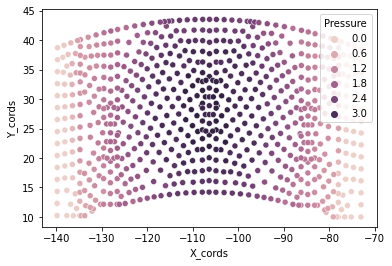

In [73]:
sns.scatterplot(x,y,hue=results["Pressure"])

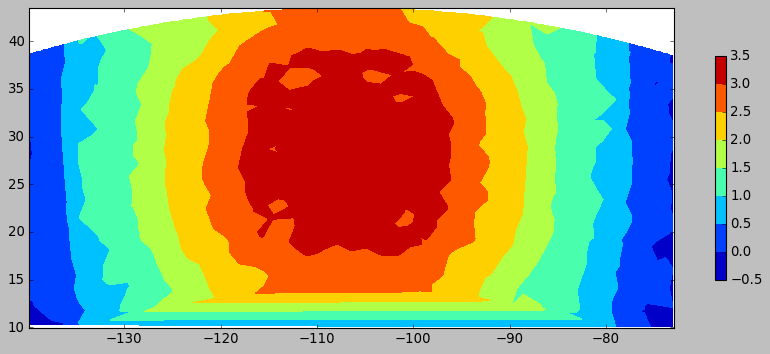

In [74]:
from scipy.interpolate import griddata
def plot_contour(x,y,z,resolution = 500,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

X,Y,Z = plot_contour(x,y,z,resolution = 500,contour_method='linear')

with plt.style.context("classic"):
    
    fig, ax = plt.subplots(figsize=(13,5))
    #ax.scatter(x,y, color="black", linewidth=1, edgecolor="blue")
    
    plt.colorbar(ax.contourf(X,Y,Z),shrink=0.7)
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)